# Laboratorio: Grafici e Raggruppamento di Dati con pandas

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
`nome.cognome@unibo.it`

## Dataset: Mance Lasciate dai Clienti

- _tips_ è un set di dati raccolti ipoteticamente da un cameriere sulle mance che ha ricevuto dai clienti in un certo periodo di tempo
- Scarichiamo il dataset in locale

In [1]:
import os.path
if not os.path.exists("tips.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/vptsn", "tips.csv")

- Usiamo la funzione `read_csv` per caricare il file e visualizziamone alcune righe

In [2]:
import pandas as pd
tips = pd.read_csv("tips.csv")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Significati delle Colonne

- `total_bill`: totale del conto
- `tip` mancia lasciata dal cliente pagante
- `sex`: sesso del cliente pagante
- `smoker`: se nel gruppo erano presenti fumatori
- `day`: giorno della settimana
- `time`: pranzo o cena
- `size`: numero di persone al tavolo

I tipi dei dati sono:
- numeri decimali in `total_bill` e `tip` (quantità di denaro)
- numeri interi in `size`
- categorici nelle altre colonne

- Possiamo vedere i tipi delle colonne assegnati da pandas e la memoria occupata dal DataFrame col metodo `info`

In [4]:
tips.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 64.0 KB


- Le colonne `sex`, `smoker`, `day` e `time` sono considerate di tipo `object` in quanto stringhe, ma sappiamo che sono categoriche

- Carichiamo nuovamente il DataFrame specificando con l'opzione `dtype` che le colonne di indici da 2 a 5 devono essere categoriche

In [5]:
tips = pd.read_csv("tips.csv", dtype={x: "category" for x in range(2, 6)})

- Otteniamo un DataFrame con gli stessi dati sopra...

In [6]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


- ...ma con occupazione di memoria ridotta di quasi 10 volte

In [7]:
tips.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.5 KB


- Il risparmio di memoria conta poco per dataset piccoli come questo, ma può fare la differenza per dataset molto grandi

## Esercizi A: Ripasso Operazioni sui DataFrame

Eseguire queste operazioni senza aggiungere colonne al DataFrame o modificarlo in altri modi

- **1)** Estrarre il numero di persone nella prima riga della tabella (la cui etichetta è 0)
  - promemoria: `DataFrame.loc[riga, colonna]`
- **2)** Calcolare la media delle mance ricevute
- **3)** Estrarre dalla tabella la riga relativa al tavolo col totale del conto più alto
  - promemoria: `Serie.idxmax()` = etichetta del valore più alto
- **4)** Suddividere i totali dei conti in tre fasce di uguale ampiezza e stampare il numero di conti in ciascuna fascia
- **5)** Calcolare qual è stata la più alta spesa media a persona in un tavolo

## Statistiche di base

- Analizziamo la distribuzione dei dati nelle colonne
- Per le colonne numeriche, possiamo ottenere delle statistiche di base con `describe`

In [8]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- Vediamo ad esempio che la mancia media è di circa 3\\$ e nella metà "centrale" dei casi (tra il 25° e il 75° percentile) è compresa tra 2\\$ e 3,5\\$

- Si può inoltre usare il metodo `aggregate` (o `agg`) per ottenere una lista di statistiche specificata

In [9]:
tips.aggregate(["sum", "mean", "std", "median"])

,total_bill,tip,size
sum,4827.770000,731.580000,627.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
median,17.795000,2.900000,2.000000


- Per le colonne nominali, possiamo usare il metodo `value_counts` su ciascuna per analizzarne la distribuzione dei valori
- Ad esempio, otteniamo i conteggi di valori `Male` e `Female` nella colonna `sex`

In [10]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

- Specificando `normalize=True` otteniamo le frequenze relative, in pratica le percentuali sul totale

In [11]:
tips["sex"].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

- Vediamo ad esempio che il conto è stato pagato da un uomo nel 64\% dei casi

- Vediamo la distribuzione con frequenze relative per le altre colonne

In [12]:
tips["smoker"].value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [13]:
tips["day"].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [14]:
tips["time"].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

## Grafici

- I grafici sono utili per indicare visivamente come sono distribuiti i valori in una serie di dati
- **matplotlib** è la libreria Python più diffusa per creare grafici di svariati tipi (a barre, a torta, ...)
- Gli oggetti pandas forniscono metodi per creare rapidamente grafici basati su matplotlib
- Per usare matplotlib, importiamo l'interfaccia semplificata `pyplot` con l'alias convenzionale `plt`

In [15]:
import matplotlib.pyplot as plt

- Per abilitare il rendering dei grafici all'interno del file Jupyter:

In [16]:
%matplotlib inline

## Grafico a Torta

- I grafici a torta sono usati per visualizzare la distribuzione di valori categorici
- Estraiamo ad esempio la colonna `sex` e i conteggi dei valori con `value_counts`
- Il metodo `plot.pie` visualizza tali conteggi e relative etichette in un grafico a torta

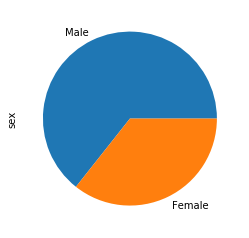

In [17]:
tips["sex"].value_counts().plot.pie()

- Possiamo visualizzare un grafico a torta anche di una serie numerica continua, discretizzandone i valori
- Usiamo ad esempio `cut` per suddividere le mance in 4 intervalli di uguale ampiezza
- Anche in questo modo vediamo la maggiore frequenza di mance basse

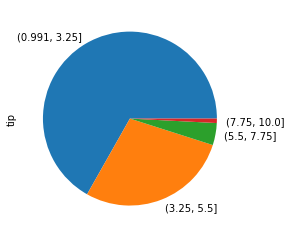

In [18]:
pd.cut(tips["tip"], 4).value_counts().plot.pie()

## Istogramma

- Un istogramma visualizza dettagliatamente la distribuzione di valori in una serie numerica
- I valori sono divisi in intervalli di pari ampiezza, le barre del grafico indicano il numero di valori in ciascun intervallo
- Per ottenere l'istogramma di una serie numerica (es. una colonna di DataFrame) chiamarne il metodo `plot.hist`
  - è possibile specificare il numero di intervalli in cui dividere i dati (default: 10)

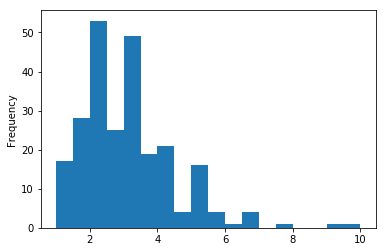

In [19]:
tips["tip"].plot.hist(18)

- Vediamo ad esempio (come indicato in parte dall'output di `describe`) dall'istogramma che la mancia massima è 10\\$, ma molte sono comprese tra 2\\$ e 3,5\\$

## Box Plot

- Un _box plot_ visualizza le statistiche di base di una o più serie di dati
- Fornisce visivamente alcune delle informazioni fornite dal metodo `describe` dei DataFrame
- Il metodo `plot.box` dei DataFrame crea un box plot di tutte le colonne numeriche

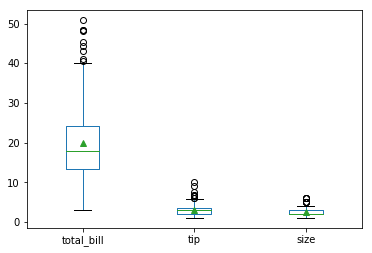

In [20]:
tips.plot.box(showmeans=True)

- Essendo i valori su scale diverse, alcuni box plot risultano schiacciati
- Possiamo chiamare `plot.box` sulle singole colonne per visualizzarle separatamente

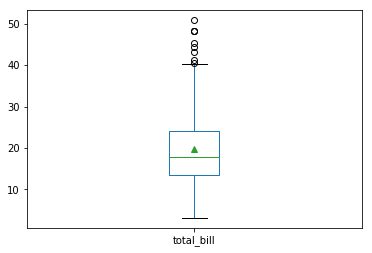

In [21]:
tips["total_bill"].plot.box(showmeans=True)

- Il rettangolo evidenzia che il 50\% "centrale" dei conti è tra i 15\\$ (primo quartile) e i 25\\$ (terzo quartile) circa
- Il triangolo (~20\\$) e la linea centrale (~18\\$) indicano rispettivamente media e mediana (secondo quartile)
- I "baffi" indicano il minimo (~2\\$) e il massimo (~40\\$) dei dati "ordinari"
- Alcuni totali particolarmente più alti rispetto alla norma sono mostrati in alto come cerchi

- pandas fornisce anche il metodo `boxplot` con alcune funzioni aggiuntive
  - con `column` si specifica di quale colonna mostrare il grafico
  - con `by` si partizionano i dati secondo il valore di un'altra colonna e si mostra il box plot per gruppi
- Vediamo ad esempio la distribuzione delle mance differenziata per giorno della settimana

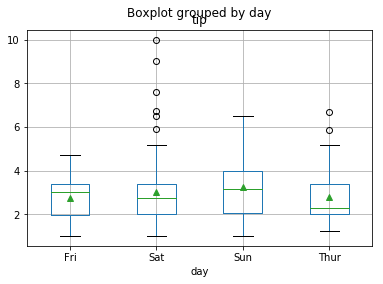

In [22]:
tips.boxplot(column="tip", by="day", showmeans=True)

## Grafico a Dispersione

- Un grafico a dispersione (_scatter plot_) visualizza la distribuzione di due variabili in modo congiunto
- In pratica, per ogni riga di un DataFrame, viene visualizzato su un piano comune un punto le cui coordinate X e Y dipendono dai valori di due colonne
- In questo modo è possibile valutare se tra tali due variabili esiste una correlazione
- Per creare un grafico a dispersione da un DataFrame, chiamare `plot.scatter` indicando i nomi delle colonne da usare come X e Y

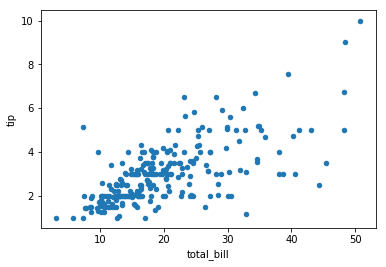

In [23]:
tips.plot.scatter("total_bill", "tip")

- Ogni punto rappresenta un conto, la coordinata X indica il totale da pagare, la Y indica la mancia lasciata
- Il grafico evidenzia che tendenzialmente la mancia è - come prevedibile - tanto più alta quanto lo è il totale da pagare

- I parametri `s` (size) e `c` (col) di `scatter` permettono di decidere dimensione e colore dei punti
  - i colori possono essere specificati in vari modi, tra cui per nome (es. `"red"`) o in stile HTML/CSS (es. `"#ff0000"`)
- Si può facilmente assegnare la stessa dimensione e/o colore a tutti i punti...

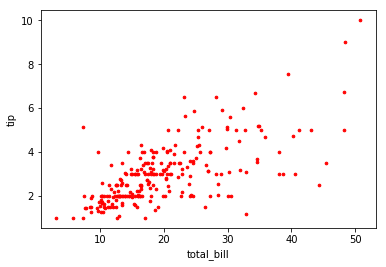

In [24]:
tips.plot.scatter("total_bill", "tip", s=7, c="red")

- Si possono però anche differenziare dimensioni e colori in base ai singoli punti, passando a `s` e `c` una serie di valori

- Ad esempio, creiamo un grafico con dimensioni dei punti corrispondenti al numero di persone e colori diversificati per pranzi e cene
  - a `s` passiamo la colonna `size` con applicata la funzione esponenziale per differenziare meglio le dimensioni
  - a `c` passiamo una serie che col colore di ciascun punto, ottenuta col metodo `map` che convertire ciascun valore in un altro secondo un dizionario dato

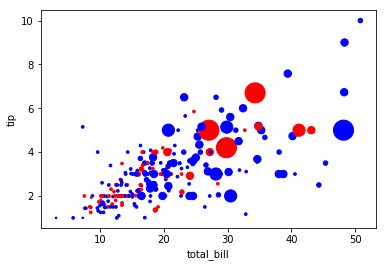

In [25]:
import numpy as np
time_colors = {"Lunch": "red", "Dinner": "blue"}
tips.plot.scatter("total_bill", "tip", s=np.exp(tips["size"]), c=tips["time"].map(time_colors))

- Se come colore viene indicata una colonna numerica, viene usata una _colormap_ per mappare i valori a colori secondo una scala

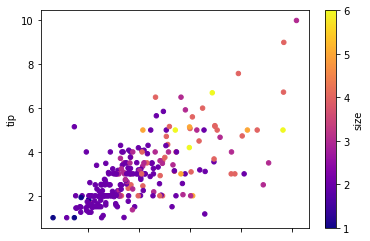

In [26]:
tips.plot.scatter("total_bill", "tip", c="size", colormap="plasma")

## Esercizi B: Grafici

- **1)** Visualizzare in un grafico a torta la distribuzione (creata nell'es. A2) dei totali dei conti in tre fasce di uguale ampiezza
- **2)** Visualizzare in un grafico a torta la distribuzione delle sole cene (`time="Dinner"`) per giorno della settimana
- **3)** Visualizzare un'istogramma con la distribuzione del rapporto tra mancia e totale del conto
- **4)** Visualizzare la stessa distribuzione in un box plot
- **5)** Visualizzare in un grafico a dispersione la correlazione tra mancia lasciata e numero di persone al tavolo

## Raggruppamento

- Sui DataFrame è possibile creare delle partizioni delle righe in due o più gruppi
- I gruppi sono definiti in base ai valori in una o più colonne o a valori derivati da esse
- Dalla partizione è possibile compiere operazioni separate sui singoli gruppi, in particolare ottenere statistiche separate per gruppo

### Raggruppamento su colonna singola

- Come primo esempio, definiamo una partizione in base al valore della singola colonna `time`, che distingue i tavoli per pranzo ("Lunch") e cena ("Dinner")
- Usiamo il metodo `groupby` indicando il nome della colonna

In [27]:
tips_by_time = tips.groupby("time")

- La partizione così creata contiene due gruppi, come verificabile dall'attributo `ngroups`

In [28]:
tips_by_time.ngroups

2

- Il dizionario `groups` contiene gli indici delle righe di ciascun gruppo
- Le chiavi sono i nomi dei gruppi, corrispondenti ai valori della colonna di raggruppamento

In [29]:
list(tips_by_time.groups.keys())

['Dinner', 'Lunch']

- `size` restituisce una serie col numero di righe in ciascun gruppo

In [30]:
tips_by_time.size()

time
Dinner    176
Lunch      68
dtype: int64

- Con `get_group` possiamo ottenere un DataFrame con la selezione delle righe di un singolo gruppo, dato il suo nome

In [31]:
tips_by_time.get_group("Lunch").head()

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2


- Sulla partizione è possibile chiamare i metodi di aggregazione per ottenere statistiche divise per gruppi
- Chiamiamo ad esempio il metodo `mean` per il calcolo della media

In [32]:
tips_by_time.mean()

,total_bill,tip,size
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


- Si ottiene un DataFrame con una riga per ogni gruppo, in cui sono riportate le medie di ciascuna colonna limitate a quel gruppo
- Si può vedere ad esempio che la mancia (`tip`) media è circa 3,10\\$ a cena e 2,73\\$ a pranzo

- Possiamo anche selezionare una singola colonna dal raggruppamento per ottenere statistiche per gruppi limitate ad essa

In [33]:
tips_by_time["tip"].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

- Possiamo usare `describe` per ottenere statistiche multiple

In [34]:
tips_by_time["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


### Raggruppamento su valori derivati

- Oltre che su una colonna, i gruppi possono essere creati in base a variabili derivate dalle colonne esistenti
- Ipotizziamo ad esempio di voler distinguere tra tavoli "piccoli" con 4 persone al massimo e tavoli "grandi" con più persone
- Creiamo una serie booleana che indichi se il tavolo è "grande" o meno e la passiamo come argomento a `groupby`

In [35]:
tips_by_large = tips.groupby(tips["size"] > 4)

- Otteniamo quindi una partizione nei gruppi `False` (tavoli piccoli) e `True` (tavoli grandi)

In [36]:
list(tips_by_large.groups.keys())

[False, True]

- Anche in questo caso possiamo calcolare statistiche per gruppo

In [37]:
tips_by_large.mean()

,total_bill,tip,size
size,,,
False,19.311106,2.938468,2.459574
True,32.184444,4.560000,5.444444


- Ovviamente nei tavoli più grandi sia il totale dei conti che le mance sono in media maggiori

### Chiavi di raggruppamento multiple

- Creiamo ora una partizione basata su due diverse colonne categoriche: `time` (pranzo o cena) e `smoker` (fumatori o non)
- Passiamo a `groupby` la lista dei nomi delle colonne

In [38]:
tips_by_time_smoker = tips.groupby(["time", "smoker"])

- Abbiamo un totale di 2×2 = 4 gruppi possibili

In [39]:
list(tips_by_time_smoker.groups.keys())

[('Dinner', 'No'), ('Dinner', 'Yes'), ('Lunch', 'No'), ('Lunch', 'Yes')]

- Ciascun gruppo è identificato da una tupla di due valori corrispondenti alle due chiavi: ad esempio `('Dinner', 'No')` indica tavoli a cena di non fumatori

- Anche in questo caso possiamo calcolare le medie per ciascun gruppo

In [40]:
tips_by_time_smoker.mean()

total_bill       tip      size
time   smoker                                
Dinner No       20.095660  3.126887  2.735849
       Yes      21.859429  3.066000  2.471429
Lunch  No       17.050889  2.673778  2.511111
       Yes      17.399130  2.834348  2.217391

- Il DataFrame ottenuto mostra un esempio di **indice delle righe a più livelli**: ciascuna riga è etichettata da una tupla di valori piuttosto che da uno come visto finora
- In questo esempio i livelli sono due, per cui ogni riga è identificata da una tupla di due elementi
- A ogni livello può essere associato un nome: quì i nomi (`time` e `smoker`) sono quelli delle colonne nel DataFrame originale

- Anche una serie può avere un indice a più livelli
- Usiamo ad esempio `size` per ottenere il numero di elementi di ciascun gruppo

In [41]:
tips_by_time_smoker.size()

time    smoker
Dinner  No        106
        Yes        70
Lunch   No         45
        Yes        23
dtype: int64

- Abbiamo una serie di 4 valori, ciascuno etichettato da una coppia di elementi

- Per estrarre un singolo elemento dalla serie (o una singola riga dal DataFrame), specifichiamo l'etichetta in forma di tupla

In [42]:
tips_by_time_smoker.size()[("Dinner", "No")]

106

- Possiamo specificare un'etichetta parziale per estrarre una porzione dei dati
  - ad esempio indichiamo `"Dinner"` per estrarre tutte le righe con etichetta `("Dinner", *)`
  - il livello `time` dell'indice sul quale è compiuta la selezione è rimosso dalla selezione, lasciando solo `smoker`

In [43]:
tips_by_time_smoker.size()["Dinner"]

smoker
No     106
Yes     70
dtype: int64

## Pivoting

- Le operazioni di _pivoting_ permettono di riorganizzare i valori contenuti in una serie o DataFrame con indice a più livelli
- Un livello presente nell'indice della serie o delle righe del DataFrame può essere spostato nelle colonne o viceversa
  - `stack` sposta un livello dalle colonne alle righe, per cui dati che erano affiancati sono messi uno sopra l'altro ("stacked")
  - `unstack` compie l'operazione inversa, spostando un livello dalle righe alle colonne

- Ad esempio, presa la serie con indice a due livelli ottenuta sopra...

In [44]:
tips_by_time_smoker.size()

time    smoker
Dinner  No        106
        Yes        70
Lunch   No         45
        Yes        23
dtype: int64

- ...posso usare `unstack` per ottenere un DataFrame dove uno dei due livelli tra `time` e `smoker` rimane come indice delle righe e l'altro diventa indice delle colonne
- Ad esempio, imposto `smoker` come indice delle colonne per ottenere una tabella dove ogni riga corrisponde ad un valore di `time` e ogni colonna ad uno di `smoker`
- Il DataFrame ha gli stessi dati della serie, ma ridisposti in una tabella

In [45]:
tips_by_time_smoker.size().unstack("smoker")

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


- Il metodo `unstack` può essere chiamato anche su un DataFrame, introducendo più livelli di colonne
- Ad esempio, calcolando le medie per gruppo otteniamo un DataFrame con due livelli di righe (gli stessi della serie sopra) e uno di colonne (le colonne del DataFrame originale)

In [46]:
tips_by_time_smoker.mean()

total_bill       tip      size
time   smoker                                
Dinner No       20.095660  3.126887  2.735849
       Yes      21.859429  3.066000  2.471429
Lunch  No       17.050889  2.673778  2.511111
       Yes      17.399130  2.834348  2.217391

- Chiamando `unstack` possiamo far diventare ad es. `time` un livello di colonne

In [47]:
tips_by_time_smoker.mean().unstack("time")

total_bill                  tip                size          
time       Dinner      Lunch    Dinner     Lunch    Dinner     Lunch
smoker                                                              
No      20.095660  17.050889  3.126887  2.673778  2.735849  2.511111
Yes     21.859429  17.399130  3.066000  2.834348  2.471429  2.217391

- Con l'operazione inversa `stack` possiamo spostare un livello di colonne a livello di righe
- Ad esempio, sul DataFrame con le medie, spostando l'unico livello di colonne otteniamo una serie con indice a tre livelli
  - si noti che il livello delle colonne non ha nome

In [48]:
tips_by_time_smoker.mean().stack()

time    smoker            
Dinner  No      total_bill    20.095660
                tip            3.126887
                size           2.735849
        Yes     total_bill    21.859429
                tip            3.066000
                size           2.471429
Lunch   No      total_bill    17.050889
                tip            2.673778
                size           2.511111
        Yes     total_bill    17.399130
                tip            2.834348
                size           2.217391
dtype: float64

- Il metodo `pivot_table` permette di creare rapidamente da un DataFrame una tabella di valori aggregati specificando direttamente
  - le colonne da usare come valori (default: tutte le numeriche)
  - le colonne da usare come livelli di righe (`index`) e di colonne (`columns`)
  - il nome di una o più funzioni con cui aggregare i dati (default: "mean", media)
- Ad esempio, per ottenere la tabella delle medie sopra con `smoker` = No/Yes sulle righe possiamo scrivere:

In [49]:
tips.pivot_table(index="smoker", columns="time")
# invece di: tips.groupby(["time", "smoker"]).mean().unstack("time")

size                 tip           total_bill           
time      Dinner     Lunch    Dinner     Lunch     Dinner      Lunch
smoker                                                              
No      2.735849  2.511111  3.126887  2.673778  20.095660  17.050889
Yes     2.471429  2.217391  3.066000  2.834348  21.859429  17.399130

- Altro esempio: una tabella con le medie delle sole mance, raggruppate per giorno (righe) e per distinzione tra tavoli con più di 4 persone e non (colonne)
  - col metodo `rename` delle serie è possibile assegnare un nome significativo ("is_large") al livello delle colonne

In [50]:
#                dati   righe  colonne                                aggregazione
tips.pivot_table("tip", "day", (tips["size"] > 4).rename("is_large"), "mean")

is_large,False,True
day,,
Fri,2.734737,NaN
Sat,2.993023,3.000
Sun,3.197917,4.285
Thur,2.602241,5.225


- Nei dati non c'è alcun esempio di tavoli grandi (colonna `True`) di venerdì (riga `Fri`): nella cella corrispondente abbiamo un valore mancante (NaN)

- Altro esempio: una tabella con le medie e deviazioni standard delle mance, raggruppate per giorno e pasto (righe) e presenza o no di fumatori (colonne)

In [51]:
#                dati   righe            colonne   aggregazioni
tips.pivot_table("tip", ["day", "time"], "smoker", ["mean", "std"])

mean                 std          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.750000  3.003333  1.089725  1.234038
     Lunch   3.000000  2.280000       NaN  0.662239
Sat  Dinner  3.102889  2.875476  1.642088  1.630580
Sun  Dinner  3.167895  3.516842  1.224785  1.261151
Thur Dinner  3.000000       NaN       NaN       NaN
     Lunch   2.666364  3.030000  1.296821  1.113491

- Se in intere righe o colonne risulterebbero valori mancanti, queste sono omesse dal DataFrame (quì ad es. mancano le righe dei pranzi di sabato e domenica)

## Esercizi C: Raggruppamento e Pivoting

- **1)** Ottenere una serie con la mancia media per ogni giorno della settimana
- **2)** Ottenere un DataFrame col numero di conti per ogni giorno della settimana lungo le righe e ogni pasto lungo le colonne
- **3)** Dividere i totali dei conti in tre fasce di uguale ampiezza ed ottenere un DataFrame con una riga per ciascuna fascia che riporti la media di totali e mance divise per pranzi e cene